In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import os

In [15]:
os.listdir(r"C:\Users\atarb\OneDrive\Desktop\data analysis w Python\Uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [16]:
uber_15 = pd.read_csv(r"C:\Users\atarb\OneDrive\Desktop\data analysis w Python\Uber\Datasets/uber-raw-data-janjune-15_sample.csv")

In [13]:
uber_15.shape

(100000, 4)

In [16]:
uber_15.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [17]:
uber_15.tail(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68
99999,B02764,2015-06-24 16:04:00,B02764,125


In [29]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [28]:
uber_15.duplicated().sum() # Sum of the duplicated values

54

In [30]:
uber_15.drop_duplicates(inplace=True) #REMOVE DUPLICATED ROWS

In [31]:
uber_15.duplicated().sum()

0

In [32]:
uber_15.dtypes #CHECK DATA TYPES

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
#CHANGE DATA TYPE OF PICKUP_DATE FROM OBJECT TO DATE-TIME (from string to timestamp)

In [39]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [43]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date']) #CHANGE DATA TYPE FROM OBJECT TO DATE-TIME (from string to timestamp)

In [45]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [47]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

# Which month does have maximum pickups?

In [ ]:
# Extract month data from the pickup_date

In [55]:
uber_15['month']=uber_15['Pickup_date'].dt.month_name()

In [56]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March
...,...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234,April
99996,B02764,2015-03-06 21:32:00,B02764,24,March
99997,B02598,2015-03-19 19:56:00,B02598,17,March
99998,B02682,2015-05-02 16:02:00,B02682,68,May


In [57]:
uber_15['month'].value_counts()

June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: month, dtype: int64

<Axes: >

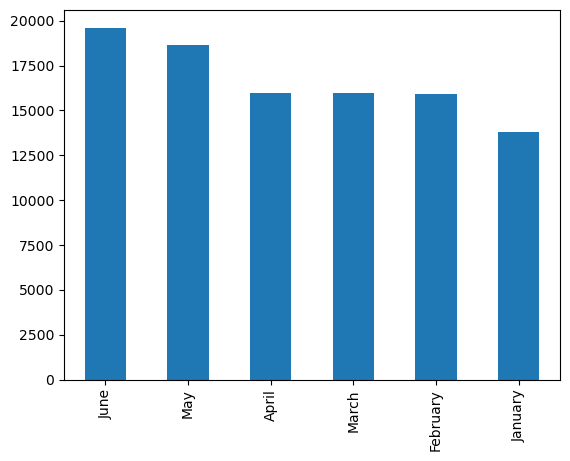

In [60]:
uber_15['month'].value_counts().plot(kind='bar')

In [64]:
# Extract weekday, days, hour and minute data from the pickup_date

uber_15['weekday']=uber_15['Pickup_date'].dt.day_name() 
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['minute']=uber_15['Pickup_date'].dt.minute

In [65]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,day,weekday,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,2,Saturday,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,20,Tuesday,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,19,Thursday,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,10,Friday,17,38


In [67]:
#Create a table with months and weekdays

pivot = pd.crosstab(index=uber_15['month'], columns=uber_15['weekday']) 

In [68]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [87]:
# Define the order of months
month_order = ['January', 'February', 'March' , 'April' , "May" , 'June'] 
 
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  
 
pivot_sorted = pivot.reindex(index=month_order).reindex(columns=weekday_order)


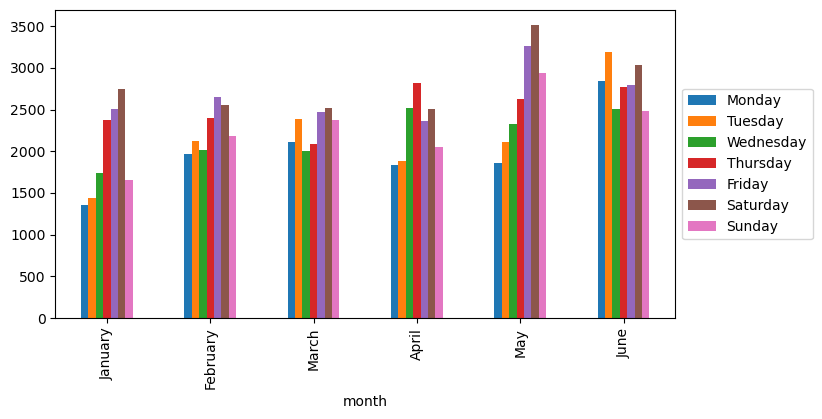

In [94]:
graph = pivot_sorted.plot(kind='bar', figsize=(8,4))
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move the legend outside the plot


# Hourly rush in NYC on each day

In [139]:
summary = uber_15.groupby(['weekday','hour'], as_index=False).size() #Group the data by hours and weekdays
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


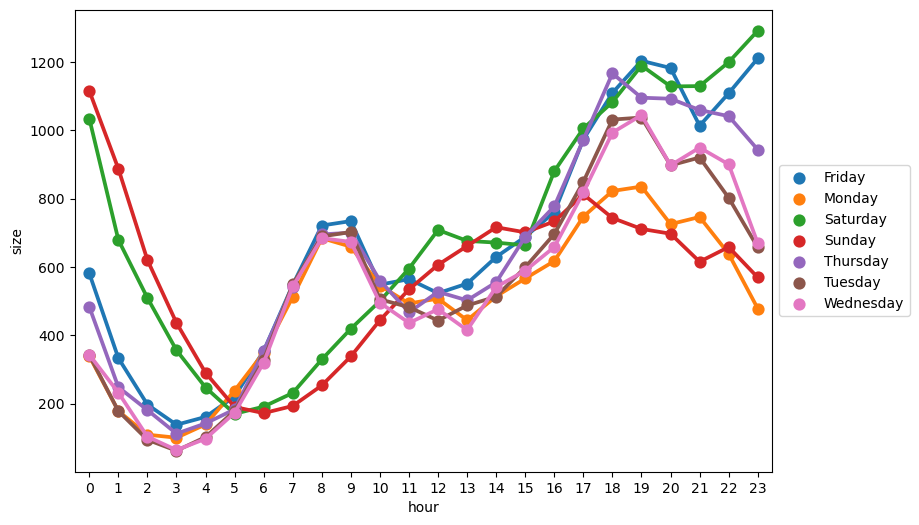

In [136]:
plt.figure(figsize=(9,6)) # Define the size of the pointplot

pointplt = sns.pointplot(x='hour', y='size', hue='weekday', data=summary)  # Draw a pointplot of summary

pointplt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move the legend outside the plot


In [140]:
# Conclude that New Yorkers start their weekend from Thursday and they finish their nights on after the midnight on the weekend.

# Most Active Uber Base Number

In [ ]:
# Which base number has the most active vehicles?

In [141]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

In [150]:
os.listdir(r"C:\Users\atarb\OneDrive\Desktop\data analysis w Python\Uber\Datasets") 

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [17]:
uber_foil = pd.read_csv(r"C:\Users\atarb\OneDrive\Desktop\data analysis w Python\Uber\Datasets/Uber-Jan-Feb-FOIL.csv") 
# Retrieve active vehicle data from another csv file

uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [18]:
!pip install chart_studio
!pip install plotly

In [19]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import iplot, plot, download_plotlyjs, init_notebook_mode

init_notebook_mode(connected = True)

In [20]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [21]:
px.box(x= 'dispatching_base_number', y='active_vehicles', data_frame=uber_foil) #Box graph

In [22]:
px.violin(x= 'dispatching_base_number', y='active_vehicles', data_frame=uber_foil) # Distribution + box

In [ ]:
# Conclude that B02764 has the maximum number of active vehicles.